In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


In [2]:
rho_man = [785.3, 0.1]
k_man = [0.2, 0]
g = [9.8, 0.1]
sigma_alc = [np.mean([22.78, 21.9]), 0.2]
rho_alc = rho_man.copy()

In [3]:
# Пункт задания 3

h_p_0 = [43, 1]

DP_alc = countWithSigma(rho_man[0] * g[0] * h_p_0[0] * k_man[0], [rho_man, g, h_p_0])
d_needle1 = countWithSigma(4 * sigma_alc[0] / DP_alc[0], [sigma_alc, DP_alc])

print("DP_alc: " + texAns(DP_alc))
print("d_needle1: " + texAns(d_needle1))

d_needle = [1.1, 1.05]
d_needle = [np.mean(d_needle), np.sqrt(np.std(d_needle)**2 + 0.05**2)]

print("d_microscope: " + texAns(d_needle))

DP_alc: $(66000 \pm 2000)$
d_needle1: $(0.00135 \pm 0.00004)$
d_microscope: $(1.08 \pm 0.06)$


In [4]:
# Пункт задания 4

h_p_1 = [118, 1]
P_1 = countWithSigma(rho_man[0] * g[0] * h_p_1[0] * k_man[0], [rho_man, g, h_p_1])

print("P_1: " + texAns(P_1))

h_1 = [21.5, 0.5]

sigma_water_from_alc = countWithSigma(sigma_alc[0] * h_p_1[0] / h_p_0[0], [sigma_alc, h_p_0, h_p_1])
print("sigma_water: " + texAns(sigma_water_from_alc))

P_1: $(182000 \pm 2000)$
sigma_water: $(61 \pm 2)$


In [5]:
# Пункт задания 5

h_p_2 = [188, 1]
P_2 = countWithSigma(rho_man[0] * g[0] * h_p_2[0] * k_man[0], [rho_man, g, h_p_2])

print("P_2: " + texAns(P_2))

h_2 = [6.5, 0.5]

rho_water = [997, 0.1]

D_P = [P_2[0] - P_1[0], np.sqrt(P_2[1]**2 + P_1[1]**2)]
D_h_P = countWithSigma(D_P[0] / (rho_water[0] * g[0]), [D_P, rho_water, g])

D_h_h = [h_1[0] - h_2[0], np.sqrt(h_2[1]**2 + h_1[1]**2)]

print("D_P: " + texAns(D_P))
print("D_h_P: " + texAns(D_h_P))
print("D_h_h: " + texAns(D_h_h))

P_2: $(289000 \pm 3000)$
D_P: $(108000 \pm 4000)$
D_h_P: $(11.0 \pm 0.4)$
D_h_h: $(15.0 \pm 0.7)$


In [6]:
# Пункт задания 6

def result(T_, h_):
    T_ = [T_ + 273, 0.1]
    h_ = [h_, 1]
    P_ = [i / 1000 for i in countWithSigma(rho_alc[0] * g[0] * h_[0] * k_man[0], [rho_alc, g, h_])]
    sigma_ = countWithSigma(P_[0] * d_needle[0] / 4, [P_, d_needle])

    return [T_, h_, P_, sigma_]


results = [result(25.3, 188), result(27.4, 187), result(30.4, 186), result(33.4, 185), result(36.3, 184),
           result(39.3, 184), result(42.2, 183), result(45.2, 182), result(48.3, 181)]

table = [["№", "$T, K$", "$h, мм$", "$P, Па$", "$\sigma, мН/м$"]]
for i in range(len(results)):
    arr = [i + 1]
    for j in results[i]:
        arr.append("$" + texAns(j)[2:-2] + "$")
    table.append(arr)

texTable(table)



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|}
        \hline

        № & $T, K$ & $h, мм$ & $P, Па$ & $\sigma, мН/м$\\ \hline
        1 & $298.30 \pm 0.10$ & $188.0 \pm 1.0$ & $289 \pm 3$ & $78 \pm 4$\\ \hline
        2 & $300.40 \pm 0.10$ & $187.0 \pm 1.0$ & $288 \pm 3$ & $77 \pm 4$\\ \hline
        3 & $303.40 \pm 0.10$ & $186.0 \pm 1.0$ & $286 \pm 3$ & $77 \pm 4$\\ \hline
        4 & $306.40 \pm 0.10$ & $185.0 \pm 1.0$ & $285 \pm 3$ & $77 \pm 4$\\ \hline
        5 & $309.30 \pm 0.10$ & $184.0 \pm 1.0$ & $283 \pm 3$ & $76 \pm 4$\\ \hline
        6 & $312.30 \pm 0.10$ & $184.0 \pm 1.0$ & $283 \pm 3$ & $76 \pm 4$\\ \hline
        7 & $315.20 \pm 0.10$ & $183.0 \pm 1.0$ & $282 \pm 3$ & $76 \pm 4$\\ \hline
        8 & $318.20 \pm 0.10$ & $182.0 \pm 1.0$ & $280 \pm 3$ & $75 \pm 4$\\ \hline
        9 & $321.30 \pm 0.10$ & $181.0 \pm 1.0$ & $279 \pm 3$ & $75 \pm 4$\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



k: (-0.11801291943318477 +- 0.005736094129703674)
b: (112.81251383750367 +- 1.7754004935033703)


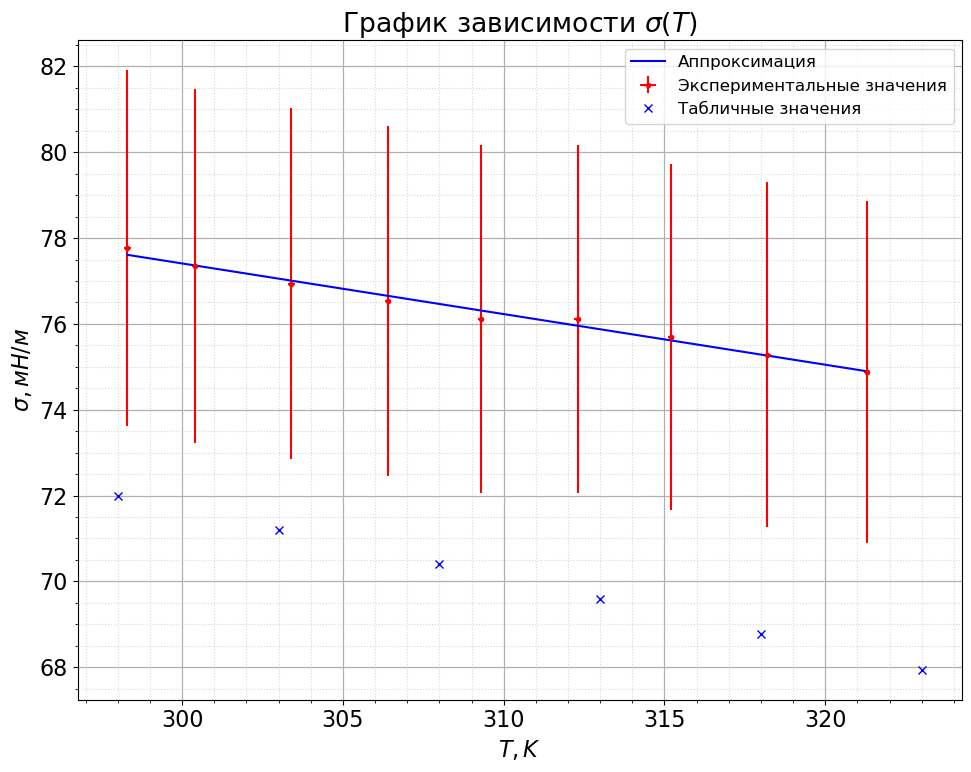

dsigma_div_dT: $(-0.118 \pm 0.009)$
kirhgoff_left: $(-74 \pm 4)$


In [7]:
# Пункт задания 8

plot_x_ = [i[0][0] for i in results]
plot_y_ = [i[3][0] for i in results]

plot_x_err_ = [i[0][1] for i in results]
plot_y_err_ = [i[3][1] for i in results]

P_mean = [np.mean([i[2][0] for i in results]), np.mean([i[2][1] for i in results])]
T_mean = [np.mean([i[0][0] for i in results]), np.mean([i[0][1] for i in results])]

table_x = [25, 30, 35, 40, 45, 50]
table_y = [71.99, 71.20, 70.41, 69.60, 68.78, 67.94]

table_x = [i + 273 for i in table_x]

dsigma_div_dT, b = make_mnk_with_table_values("graph/sigma_T_plot.png", r"График зависимости $\sigma(T)$", "$T, K$", r"$\sigma, мН/м$", plot_x_, plot_y_, plot_x_err_, plot_y_err_, table_x, table_y)

dsigma_div_dT_inacc = np.sqrt(dsigma_div_dT[0]**2 * ((d_needle[1] / d_needle[0])**2 + (P_mean[1] / P_mean[0])**2 + (T_mean[1] / T_mean[0])**2) + dsigma_div_dT[1]**2)
dsigma_div_dT[1] = dsigma_div_dT_inacc
print("dsigma_div_dT: " + texAns(dsigma_div_dT))

C_P_steam = [34, 1]
C_P_water = [76, 1]
L_0 = [44, 1]
sigma_0 = [78, 4]

kirhgoff_left = countWithSigma((C_P_steam[0] - C_P_water[0]) / L_0[0] * sigma_0[0], [C_P_water, L_0, sigma_0])

print("kirhgoff_left: " + texAns(kirhgoff_left))

k: (1.0554899079751046e-08 +- 0.0009620462403403885)
b: (112.8125105554403 +- 0.30250596500309906)


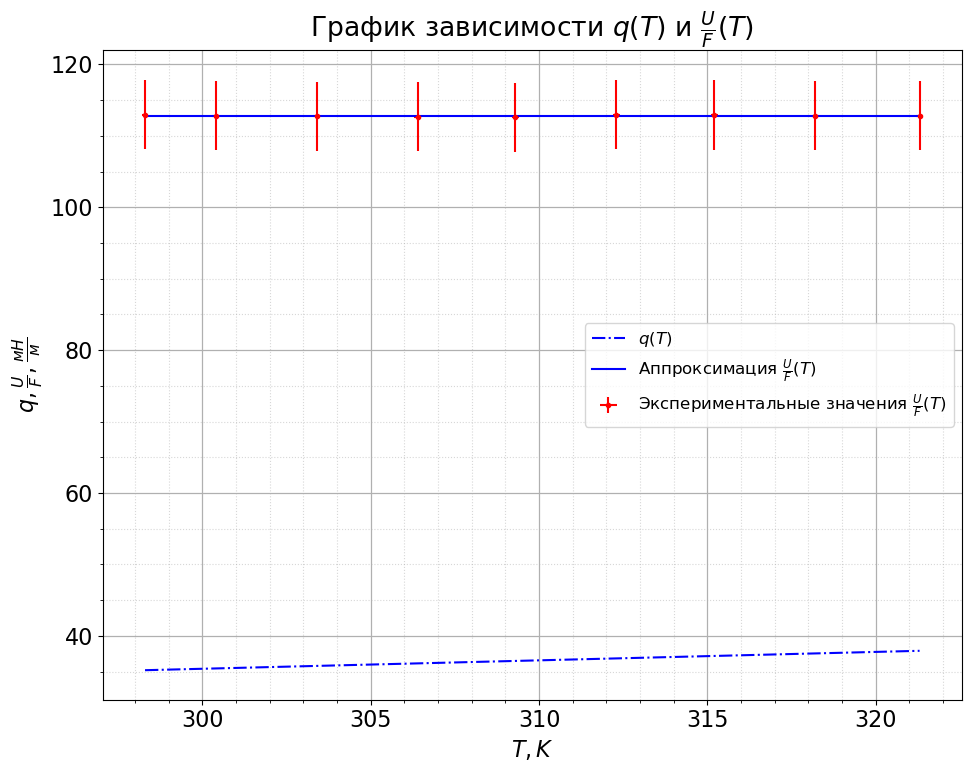

In [8]:
# Пункт задания 9

q_x = [i[0][0] for i in results]
q_y = [-i[0][0] * dsigma_div_dT[0] for i in results]

U_div_F_x = [i[0][0] for i in results]
U_div_F_y = [i[3][0] - i[0][0] * dsigma_div_dT[0] for i in results]

U_div_F_x_err = [i[0][1] for i in results]
U_div_F_y_err = [np.sqrt(i[0][0]**2 * dsigma_div_dT[0]**2 * ((dsigma_div_dT[1] / dsigma_div_dT[0])**2 + (i[0][1] / i[0][0])**2) + i[3][1]**2) for i in results]

mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title(r"График зависимости $q(T)$ и $\frac{U}{F}(T)$")
plt.ylabel(r"$q, \frac{U}{F}, \frac{мН}{м}$")
plt.xlabel("$T, K$")

plt.plot(q_x, q_y, "b", label = "$q(T)$", linestyle = 'dashdot')

def func(x, k, b):
    return x * k + b

popt, pcov = curve_fit(func, U_div_F_x, U_div_F_y, p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

print("k: ({} +- {})".format(k, dk))
print("b: ({} +- {})".format(b, db))

#plt.errorbar(x, y, "or", markersize = 9, label = 'Экспериментальные значения')
plt.errorbar(U_div_F_x, U_div_F_y, xerr = U_div_F_x_err, yerr = U_div_F_y_err, fmt='.r', label = r'Экспериментальные значения $\frac{U}{F}(T)$')
#plt.plot(x, y, "+b", label = "Экспериментальные данные", linewidth = 1)

x_lin = np.linspace(U_div_F_x[0], U_div_F_x[-1], 1000)
plt.plot(x_lin, func(x_lin, k, b), "b", label = r"Аппроксимация $\frac{U}{F}(T)$")

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

plt.savefig("graph/q_T_and_U_div_F_T_plot.png")
plt.show()